# Web scraping on Reddit

# 

In [ ]:
#!pip install psaw

In [1]:
import copy
import numpy as np
import pandas as pd
import time

from datetime import datetime 
from psaw import PushshiftAPI

# I - Importation des données

In [3]:
api = PushshiftAPI()

In [ ]:
#search for posts of the year 2021
start_epoch_2021 = int(datetime(2021, 1, 1).timestamp())
end_epoch_2021 = int(datetime(2021, 12, 29).timestamp())

api_request_generator_21 = api.search_submissions(
    after=start_epoch_2021,
    before=end_epoch_2021,
    subreddit='antiwork',
    limit=1000,
    score=">50"
)

df21 = pd.DataFrame([submission.d_ for submission in api_request_generator_21])

df21["created_utc"] = df21["created_utc"].apply(datetime.fromtimestamp)

time.sleep(1)


#search for posts of the year 2020

start_epoch_2020 = int(datetime(2020, 1, 1).timestamp())
end_epoch_2020 = int(datetime(2020, 12, 31).timestamp())

api_request_generator_20 = api.search_submissions(
    after=start_epoch_2020,
    before=end_epoch_2020,
    subreddit='antiwork',
    limit=1000,
    score=">50"
)

df20 = pd.DataFrame([submission.d_ for submission in api_request_generator_20])

df20["created_utc"] = df20["created_utc"].apply(datetime.fromtimestamp)

time.sleep(1)


#search for posts of the year 2019

start_epoch_2019 = int(datetime(2019, 1, 1).timestamp())
end_epoch_2019 = int(datetime(2019, 12, 31).timestamp())

api_request_generator_19 = api.search_submissions(
    after=start_epoch_2019,
    before=end_epoch_2019,
    subreddit='antiwork',
    limit=2000,
    score=">50"
)

df19 = pd.DataFrame([submission.d_ for submission in api_request_generator_19])

df19["created_utc"] = df19["created_utc"].apply(datetime.fromtimestamp)

time.sleep(1)


#search for posts of the year 2018

start_epoch_2018 = int(datetime(2018, 1, 1).timestamp())
end_epoch_2018 = int(datetime(2018, 12, 31).timestamp())

api_request_generator_18 = api.search_submissions(
    after=start_epoch_2018,
    before=end_epoch_2018,
    subreddit='antiwork',
    limit=1000,
    score=">50"
)

df18 = pd.DataFrame([submission.d_ for submission in api_request_generator_18])

df18["created_utc"] = df18["created_utc"].apply(datetime.fromtimestamp)

C:\Users\nicol\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


In [5]:
df21 = df21[['score','created_utc']]
df20 = df20[['score','created_utc']]
df19 = df19[['score','created_utc']]
df18 = df18[['score','created_utc']]

In [6]:
df = pd.concat([df21,df20,df19,df18])
df = df.rename(columns={'created_utc':'date'})
df.head()

,score,date
0,57,2021-12-09 07:08:38
1,81,2021-12-09 06:22:33
2,68,2021-12-09 06:21:43
3,80,2021-12-09 06:10:49
4,221,2021-12-09 06:09:35


In [7]:
df19.shape

(1667, 2)

# II - Visualisation des données 

<AxesSubplot:title={'center':'Score des posts reddit sur le thème antiwork entre 2018 et 2021'}, xlabel='date', ylabel='score'>

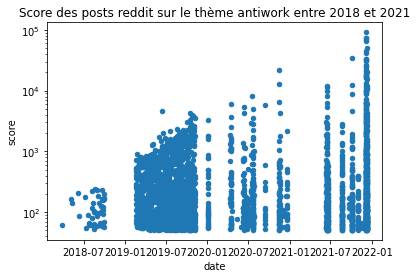

In [8]:
df.plot(kind='scatter',x='date',y='score',logy=True,title='Score des posts reddit sur le thème antiwork entre 2018 et 2021')

Ensuite, on va rendre les variables moins abrutes en créant une variable continue qui à une date donnée associe le score moyen des posts reddit sur une période fixe (un jour puis un mois).

 On envisage d'analyser la corrélation entre la situation d'économie et la tendance/ la popularité de différents subreddit sur le site internet "Reddit", par exemple la difficulté économique aux Etats Unis incite la popularité de subreddit "Antiwork". Au niveau de source de données, on envisage d'utiliser Reddit API pour acquérir les données sur Reddit, et le site internet de World Bank pour les données économiques.

In [65]:
df_day = copy.deepcopy(df)

def delete_hour(t):
    T = str(t)
    return pd.Timestamp(T[:10])
    
df_day['date'] = df_day['date'].apply(delete_hour) 

df_day = df_day.groupby(by='date').sum().groupby(level=[0]).cumsum()

df_day = df_day.reset_index()

<AxesSubplot:xlabel='date', ylabel='score'>

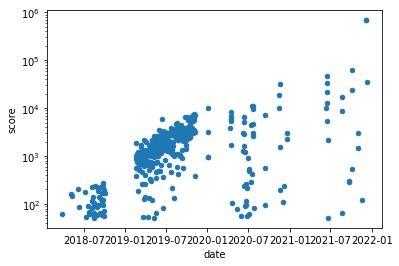

In [66]:
df_day.plot(kind='scatter',x='date',y='score',logy=True)

In [67]:
df_month = copy.deepcopy(df)

def delete_day(t):
    T = str(t)
    return pd.Timestamp(T[:7])
    
df_month['date'] = df_month['date'].apply(delete_day) 

df_month = df_month.groupby(by='date').sum().groupby(level=[0]).cumsum()

df_month = df_month.reset_index()

<AxesSubplot:xlabel='date', ylabel='score'>

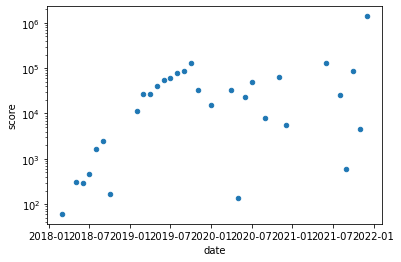

In [68]:
df_month.plot(kind='scatter',x='date',y='score',logy=True)

In [ ]:
#To sort by and manipulate date information
"""
df['date'] = pd.to_datetime(df['created_utc'], utc=True, unit='s')
df[['author', 'date', 'title', 'selftext', 'url', 'subreddit', 'score', 'num_comments', 'num_crossposts']].head(10)
"""

In [ ]:
#search for comments
"""
start_epoch=int(datetime(2021, 10, 1).timestamp())
end_epoch=int(datetime(2021, 12, 1).timestamp())

api_request_generator = api.search_comments(
                            q='work',
                            after=start_epoch,
                            before = end_epoch,
                            limit=1000,
                            score = ">200")

df2 = pd.DataFrame([submission.d_ for submission in api_request_generator])

df2["created_utc"] = df2["created_utc"].apply(datetime.fromtimestamp)
"""